# Librerias

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def superponer(imagen1, imagen2, color):
    wid, hght, channel = imagen2.shape
    
    newImage = np.copy(imagen2)

    for i in range(wid):
        for j in range(hght):
            if imagen1[i,j,0] == color[0] and imagen1[i,j,1] == color[1] and imagen1[i,j,2] == color[2]:
                newImage[i,j,:] = color
    return newImage

# Seguimiento de Límites y Códigos de cadenas
Moore boundary tracing algorithm y Algoritmo de Freeman

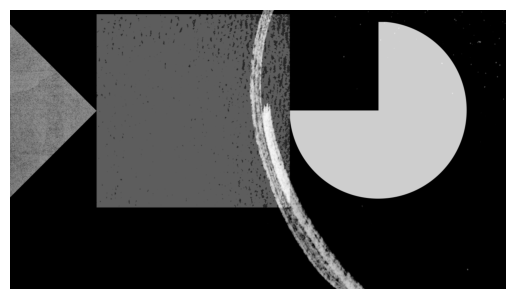

In [40]:
# Carga la imagen
circlecol = cv2.imread('../../IMAGES/1674674548143.png', 1)
circleC = cv2.cvtColor(circlecol, cv2.COLOR_BGR2RGB)

circle = cv2.imread('../../IMAGES/1674674548143.png', 0)

# Mostrar la imagen
plt.axis("off")
plt.imshow(circle, cmap='gray')

# Conectividad 8

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 

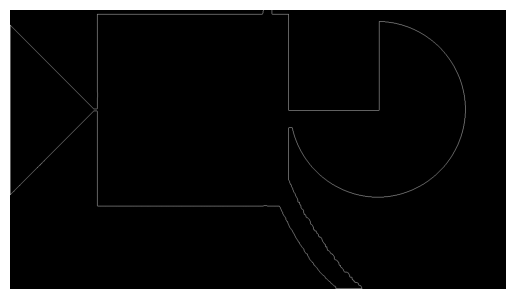

In [41]:
import sys
sys.path.append('../../FUNCIONES/SEGMENTACION')
from chain import MooreFree8
resultados8 = MooreFree8(circle)

# Imprimir lista de direcciones8
print(resultados8[1])

# Mostrar imagen con bordes
plt.axis("off")
plt.imshow(resultados8[0], cmap='gray')

In [42]:
from chain import minimum_magnitude

chain8 = np.array(resultados8[1])
min8 = minimum_magnitude(chain8)
print(min8)

[0 0 0 ... 2 2 2]


In [43]:
from chain import first_difference

dis8 = first_difference(min8, 8)
print(dis8)


[0 0 0 ... 0 0 6]


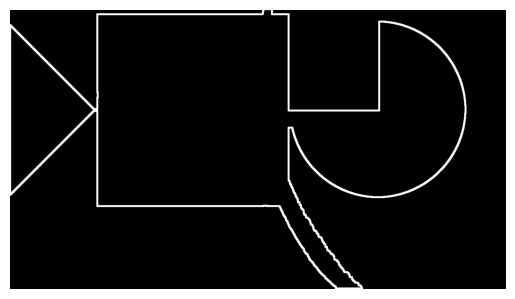

In [44]:
kernel = np.ones((5,5), np.uint8)
border_dil8 = cv2.dilate(resultados8[0], kernel, iterations=1)
plt.axis("off")
plt.imshow(border_dil8, cmap='gray')

In [50]:
besos = 0
print("BESO", besos)

print("1",border_dil8.shape)

np.delete(border_dil8, (1,2,3), axis=0)

print("2",border_dil8.shape)


# Mascara aplicada a imagen a color
# Inversa de binaria
for i in np.nditer(border_dil8, op_flags=['readwrite']):
    i[...] = 255 - i

# Guardar y volver a abrir imagen binaria para que sea compatible con la imagen a color (en 3 canales)
cv2.imwrite("../../IMAGES/test1.jpg", border_dil8)
base = cv2.imread('../../IMAGES/test1.jpg', 1)

print(base.shape)
print(circleC.shape)

# Aplicar mascara
masked8 = cv2.bitwise_and(base, circleC)

color_to_change = (0, 0, 255)
color_border8 = np.zeros((border_dil8.shape[0], border_dil8.shape[1], 3))
white_pixels = np.where(border_dil8 == 255)

for coords in zip(*white_pixels):
    color_border8[coords] = color_to_change

black_pixels = np.where(border_dil8 == 0)
for coords in zip(*black_pixels):
    color_border8[coords] = (0, 0, 0)

plt.axis("off")
plt.imshow(color_border8)

BESO 0
1 (721, 1281)
2 (721, 1281)
(721, 1281, 3)
(720, 1280, 3)


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:214: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


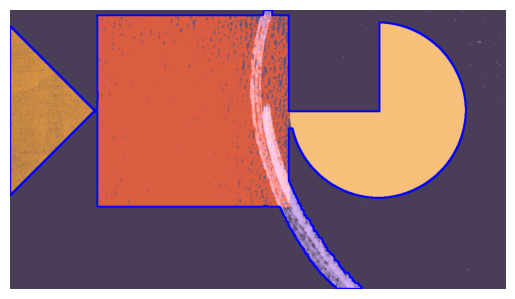

In [ ]:
mask_border8 = superponer(color_border8, circleC, color_to_change)
plt.axis("off")
plt.imshow(mask_border8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


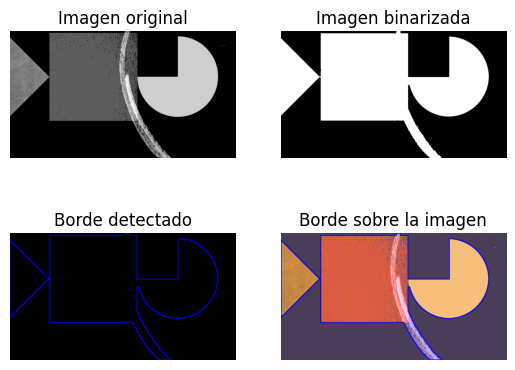

Cadena de Freeman:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(circle, cmap='gray')
ax[0,0].axis("off")
ax[0,0].set_title('Imagen original')
ax[0,1].imshow(test1, cmap='gray')
ax[0,1].axis("off")
ax[0,1].set_title('Imagen binarizada')
ax[1,0].imshow(color_border8)
ax[1,0].axis("off")
ax[1,0].set_title('Borde detectado')
ax[1,1].imshow(mask_border8)
ax[1,1].axis("off")
ax[1,1].set_title('Borde sobre la imagen')
plt.show()
print('Cadena de Freeman:')
print(resultados8[1])
print('Minimum Magnitude:')
for i in range(len(min8)):
    print(min8[i], end=" ")
print('First Difference:')
for i in range(len(dis8)):
    print(dis8[i], end=" ")

# Conectividad 4

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 

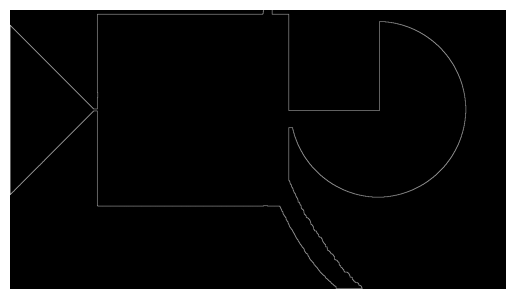

In [ ]:
from chain import MooreFree4
resultados4 = MooreFree4(circle, 255)

# Imprimir lista de direcciones4
print(resultados4[1])

# Mostrar imagen con bordes
plt.axis("off")
plt.imshow(resultados4[0], cmap='gray')

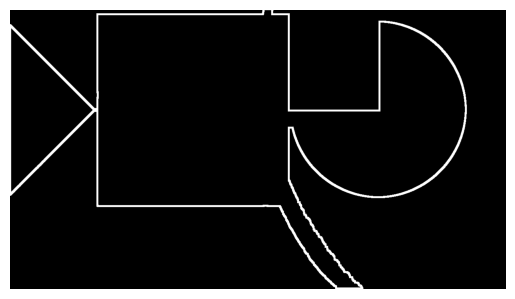

In [ ]:
border_dil4 = cv2.dilate(resultados4[0], kernel, iterations=1)
plt.axis("off")
plt.imshow(border_dil, cmap='gray')

In [ ]:
chain4 = np.array(resultados4[1])
min4 = minimum_magnitude(chain4)
for i in range(len(min4)):
    print(min4[i], end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
dis4 = first_difference(min4, 4)
for i in range(len(dis4)):
    print(dis4[i], end=" ")

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 3 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

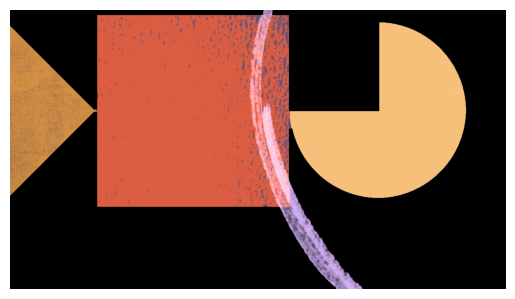

In [ ]:
# Mascara aplicada a imagen a color

# Inversa de binaria
for i in np.nditer(test1, op_flags=['readwrite']):
    i[...] = 255 - i

# Guardar y volver a abrir imagen binaria para que sea compatible con la imagen a color (en 3 canales)
cv2.imwrite("../../IMAGES/test1.jpg", test1)
base = cv2.imread('../../IMAGES/test1.jpg', 1)

circlecol = cv2.imread('../../IMAGES/1674674548143.png', 1)
circleC = cv2.cvtColor(circlecol, cv2.COLOR_BGR2RGB)

# Aplicar mascara
masked4 = cv2.bitwise_and(base, circleC)

# Mostrar fusion
plt.axis("off")
plt.imshow(masked4, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


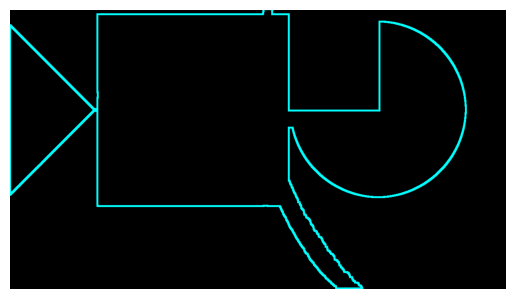

In [ ]:
color_to_change = (0, 255, 255)
color_border4 = np.zeros((border_dil4.shape[0], border_dil4.shape[1], 3))
white_pixels = np.where(border_dil4 == 255)

for coords in zip(*white_pixels):
    color_border4[coords] = color_to_change

black_pixels = np.where(border_dil == 0)
for coords in zip(*black_pixels):
    color_border4[coords] = (0, 0, 0)

plt.axis("off")
plt.imshow(color_border4)

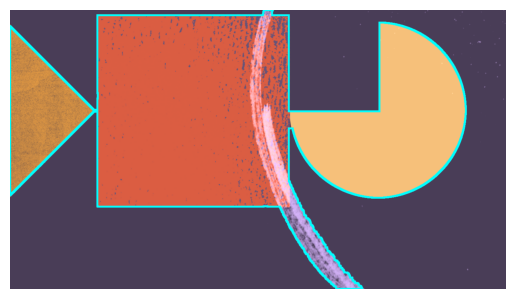

In [ ]:
mask_border = superponer(color_border, circleC, color_to_change)
plt.axis("off")
plt.imshow(mask_border)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


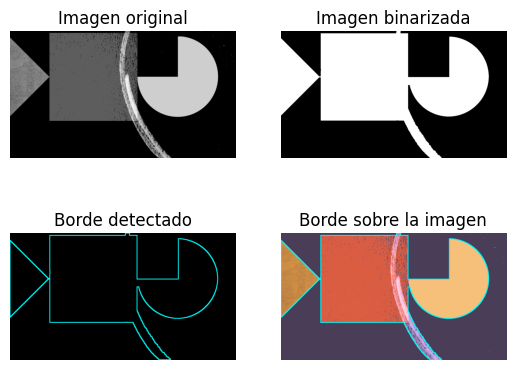

Cadena de Freeman:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7,

In [ ]:
fig, ax = plt.subplots(2,2)
ax[0,0].imshow(circle, cmap='gray')
ax[0,0].axis("off")
ax[0,0].set_title('Imagen original')
ax[0,1].imshow(test1, cmap='gray')
ax[0,1].axis("off")
ax[0,1].set_title('Imagen binarizada')
ax[1,0].imshow(color_border)
ax[1,0].axis("off")
ax[1,0].set_title('Borde detectado')
ax[1,1].imshow(mask_border)
ax[1,1].axis("off")
ax[1,1].set_title('Borde sobre la imagen')
plt.show()
print('Cadena de Freeman:')
print(resultados8[1])
print('Minimum Magnitude:')
for i in range(len(min4)):
    print(min4[i], end=" ")
print('First Difference:')
for i in range(len(dis4)):
    print(dis4[i], end=" ")

# Imagen rotada

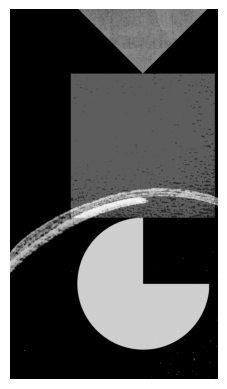

In [ ]:
# Carga la imagen
circlecol = cv2.imread('../../IMAGES/1674674548143.png', 1)
circleC = cv2.cvtColor(circlecol, cv2.COLOR_BGR2RGB)

circle = cv2.imread('../../IMAGES/1674674548143.png', 0)

rotada = cv2.rotate(circle, cv2.ROTATE_90_CLOCKWISE)

# Mostrar la imagen
plt.axis("off")
plt.imshow(rotada, cmap='gray')

In [ ]:
resultados8_r = MooreFree8(rotada, 255)

# Imprimir lista de direcciones8
print(resultados8_r[1])

# Mostrar imagen con bordes
plt.axis("off")
plt.imshow(resultados8_r[0], cmap='gray')

IndexError: index 720 is out of bounds for axis 1 with size 720